# <b>Lập trình hướng đối tượng với Python<b>

# <b>Class (lớp)</b>

 là kiểu dữ liệu do người dùng tự định nghĩa, tập hợp nhiều thuộc tính đặc trưng cho mọi đối tượng được tạo ra từ lớp đó.

Phân biệt Object và class:
- Object có trạng thái và hành vi (attributes và methods)
- Class: template mô tả trạng thái và hành vi của loại đối tương mà lớp hỗ trợ. Một đối tương là một thực thể (instance) của một lớp

# <b>1. Constructor (hàm khởi tạo)</b>

hàm gọi trong quá trình tạo object của class. Hàm tạo có tác dụng tạo các instance attribute.

In [1]:
class Person:
    """ docs string """
    def __init__(self, fname, lname):
        self.firstname = fname
        self.lastname = lname

toi = Person("Nguyen", "Le")
toi

<b>init()</b> là một hàm khởi tạo trong Python. Nó có ít nhất một tham số, thường đặt là self. Bạn hoàn toàn có thể dùng các tên khác để thay thế self. Khi có nhiều tham số trong hàm khởi tạo thì self là tham số đứng đầu tiên. self này khá giống với con trỏ this` trong C++.



Thực sự về bản chất __init__() không phải là constructor (khởi tạo object) mà là initilizer (khởi tạo các giá trị cho object). Python sử dụng magic method __new__() để tạo object cho class. __new__() mới chính là constructor thực sự của class. Do vậy ở bên trên khi thực hiện lệnh toi = Person("Nguyen", "Le") đầu tiên Python sẽ gọi __new__() để khởi tạo object, sau đó mới tới __init__() để gán các giá trị cho object đó.

# <b>2. Attribute (biến, đặc tính)</b>

là thành phần chứa dữ liệu trong class

Attribute bao gồm 2 loại là class attribute và instance attribute.
- Class attribute được khởi tạo trong thân class, đại diện cho class và toàn bộ object thuộc class đó.
- Instance class sẽ gắn liền với object khi được khởi tạo (được khởi tạo và gán giá trị trong hàm khởi tạo)

In [1]:
class Person:
    """ docs string """
    count = 0   # class attribute

    def __init__(self, fname, lname):
        self.firstname = fname      # instance attribute
        self.lastname = lname
        Person.count += 1       # cứ khởi tạo instance thì tăng lên 1

toi = Person("Nguyen", "Le")
ban = Person("A", "B")
print("Class attribute: ", Person.count)    # truy cập class attribute thông qua tên class
print("Access through instance: ", toi.count)   # truy cập class attribute qua instance


Class attribute:  2
Access through instance:  2


Instance attribute ngoài việc được tạo trong __init()__ nó còn có thể được tạo cho object cụ thể sau khi đã khởi tạo object

In [2]:
class Person:
    """ docs string """
    def __init__(self, fname, lname):
        self.firstname = fname      # instance attribute
        self.lastname = lname

toi = Person("Nguyen", "Le")
toi.new_instance = "Cong"    # tạo bên ngoài chỉ riêng cho đối tượng toi
print(toi.new_instance)
ban = Person("A", "B")
print(ban.new_instance)     # báo lỗi

Cong


AttributeError: 'Person' object has no attribute 'new_instance'

Việc tạo instance attribute ở bên ngoài chỉ có ý nghĩa cho một object cụ thể, nếu một object khác được tạo từ class thì nó không có attribute đó (như ở trên sẽ báo lỗi). Tốt nhất các instance attribute nên được tạo trong hàm __init__() để có thể chia sẻ cho tất cả các object.

# <b>3. Method (phương thức)</b>

là thành phần xử lý dữ liệu trong class (có thể gọi là function in class)

Python phân biệt các khái niệm instance method, class method (thường xử lý các class attribute) và static method (không liên quan gì đến object và class mặc dù nằm trong đó, xử lý các logic liên quan đến object)
- <b>Instance method</b> - hàm xử lý trạng thái của object. Instance method gắn liền với object và sử dụng các instance attribute (dữ liệu gắn với object).
- <b>Class method</b> - hàm xử lý của class và gắn liền với class. Class method dùng để xử lý các class attribute.
- <b>Static method</b> - không sử dụng bất kỳ thông tin nào của class và object (mặc dù vẫn nằm trong class), thường được dùng để xử lý logic nào đó liên quan đến đối tượng. đến object và class mặc dù nằm trong đó, xử lý các logic liên quan đến object).

Cũng tương tự như instance attribute có thể khai báo riêng cho từng object (ngoài class) thì instance method cũng có thể làm tương tự. Tuy nhiên khuyến khích khai báo bên trong class để cho tất cả object có phương thức đó.

## <b>Instance method - gắn liền với đối tượng</b>

In [4]:
class Person:
    """ docs string """
    def __init__(self, fname, lname):
        self.firstname = fname      # instance attribute
        self.lastname = lname

    # instance method
    def printname(self):
        return self.lastname + self.firstname

toi = Person("Nguyen", "Le")
print(toi.printname())      # nhận được LeNguyen

LeNguyen


Chú ý trong instance method ở trên tham số đầu tiên luôn là self vì nó gắn liền đối tượng. Ở bên dưới khi gọi method thì không cần truyền self vào nữa vì Python tự hiểu đó là đối tượng đang dùng.

## <b>Class method - gắn liền class, thường dùng để xử lý class attribute</b>

In [6]:
class Person:
    """ docs string """
    count = 0   # class attribute

    def __init__(self, fname, lname):
        self.firstname = fname      # instance attribute
        self.lastname = lname
        Person.count += 1       # cứ khởi tạo instance thì tăng lên 1

    # tạo class method chú ý có @classmethod trước khi định nghĩa
    @classmethod
    def show_count(cls):
        print("Có {} người trong class".format(cls.count))

toi = Person("Nguyen", "Le")
ban = Person("A", "B")

Person.show_count()

Có 2 người trong class


@classmethod trong Python là một decorator (hàm đặc biệt có thể nhận một hàm khác làm tham số để bổ sung tính năng cho hàm đó). Để có được class method từ method thông thường ta chỉ việc thêm @classmethod ngay bên trên định nghĩa.

Trong ví dụ trên nhận thấy class method cũng có một biến đặc biệt trong danh sách tham số đó là cls (viết tắt của class). Biến cls chứa thông tin của class, tương tự self chứa thông tin của object. Truy xuất attribute qua biến cls cũng giống như truy xuất attribute thông qua tên class.

Chúng ta hoàn toàn có thể gọi class method thông qua tên của object (toi.show_count()). Tuy nhiên khuyến khích nên dùng tên class đối với các class method cũng như class attribute.

## <b>Static method </b>

nằm trong class nhưng hoàn toàn tự do, không bị ràng buộc dữ liệu với class hay object, thường được sử dụng để xử lý các logic. Để tạo static method trong Python chúng ta sử dụng decorator @staticmethod.

In [8]:
class Person:
    """ docs string """
    def __init__(self, fname, lname):
        self.firstname = fname      # instance attribute
        self.lastname = lname

    @staticmethod
    def calculate_birth_year(age):
        import datetime
        year = datetime.datetime.now().year
        return year - age

print("The birth year: ", Person.calculate_birth_year(24))

The birth year:  1999


Phương thức calculate_birth_year() không sử dụng bất kì thông tin nào của class hay object, nó hoạt động độc lập. Có thể gọi static method thông qua tên của class (hoặc object cũng được nhưng không khuyến khích).

# <b>4. Tính đóng gói (encapsulation) - public, private, protected</b>

cho phép kiểm soát việc truy cập và thay đổi dữ liệu.

Tính đóng gói hạn chế quyền truy cập vào trạng thái bên trong của đối tượng. Điều này ngăn chặn dữ liệu bị sửa đổi trực tiếp. Bên C++ chúng ta có các khái niệm public (truy cập bất kì đâu), protected (truy cập trong class nội bộ và class kế thừa), private (truy cập trong class bộ). Trong Python không có các khái niệm này, thay vào đó nó sử dụng kỹ thuật name mangling.

Mặc định các thành viên trong class có thể truy cập từ mọi chỗ (giống public). Để hạn chế quyền truy cập có thể thực hiện như sau:
- Thêm _ (dấu gạch dưới) trước tên thành viên để chỉ cho phép truy cập trong class nội bộ và class kế thừa (giống protected)
- Thêm __ (2 dấu gạch dưới) trước tên thành viên để chỉ cho phép truy cập nội bộ (giống private) tránh việc thay đổi không mong muốn.

In [9]:
class Shoes:
    """ create a Shoes class """
    def __init__(self):
        # thuộc tính private ngăn chặn sửa đổi trực tiếp
        self.__maxprice = 900

    def sell(self):
        print("Giá sản phẩm: {}".format(self.__maxprice))

    def setMaxPrice(self, price):
        self.__maxprice = price

c = Shoes()
c.sell()

# Thay đổi giá trị tiếp thông qua attribute
# Do đang để private cho thuộc tính nên không thay đổi được
c.__maxprice = 1000     # chỗ này kiểu như tạo một attribute mới bên ngoài
c.sell()

# Phải sử dụng hàm setter để thay đổi giá maxprice
c.setMaxPrice(1000)
c.sell()

Giá sản phẩm: 900
Giá sản phẩm: 900
Giá sản phẩm: 1000


Nhận thấy phải dùng một hàm giống setter trong C++ để thay đổi giá trị của biến private (bắt đầu bằng __).

In [11]:
class Student:
    def __init__(self, name):
        self.__name = name
  
    def displayName(self):
        print(self.__name)
  
s = Student("A")
s.displayName()
  
# Báo lỗi
print(s.__name)

A


AttributeError: 'Student' object has no attribute '__name'

Khi chúng ta truy cập trực tiếp nó sẽ báo lỗi ngay.

# <b>5. Inheritance (tính kế thừa)</b>

cho phép chúng ta định nghĩa class mà kế thừa các phương thức và thuộc tính từ class khác. Class mẹ gọi là base class (class cơ sở), class con (kế thừa từ class mẹ) gọi là derived class (class kế thừa). Class con có thể kế thừa từ nhiều base class gọi là đa kế thừa (multiple inheritance).

In [12]:
class Person:
    """ docs string """
    def __init__(self, fname, lname):
        self.firstname = fname
        self.lastname = lname

    def printname(self):
        print(self.firstname + self.lastname)

class Student(Person):
    pass    # khi ko muốn add thêm attribute hay methods nào, kế thừa toàn bộ base class

x = Student("Mike", "Olsen")
x.printname()

MikeOlsen


Class Student sẽ có đầy đủ các phương thức, attributes như class Person (truyền pass vào). Bây giờ chúng ta sẽ thay đổi một chút hàm tạo __init__().

In [ ]:
class Student(Person):
  def __init__(self, fname, lname):
    #add properties etc

Khi thêm hàm \__init__() class Student không còn kế thừa hàm hàm \__init__() của class Person nữa. Nếu vẫn muốn kế thừa chúng ta có thể thêm hàm hàm \__init__() của Parent như sau:

In [16]:
class Student(Person):
    def __init__(self, fname, lname):
        Person.__init__(self, fname, lname)
        # có self ở đây để lưu attributes cho object, ko có sẽ báo lỗi

Hoặc vừa kế thừa vừa thêm attributes mới (vẫn đang ghi đè, cái này hay sử dụng hơn)

In [17]:
class Student(Person):
    def __init__(self, fname, lname, age):
        # có self ở đây để còn lưu attribute cho object
        # phải có self không sẽ báo lỗi
        Person.__init__(self, fname, lname)
        self.age = age

    def printage(self):
        print(self.age)

x = Student("John", "Doe", 15)
x.printname()
x.printage()

JohnDoe
15


Hoặc có thể sử dụng hàm super() để kế thừa toàn bộ thuộc tính và phương thức của base class. Mình thích dùng cái này hơn.

In [18]:
class Student(Person):
    def __init__(self, fname, lname):
        super().__init__(fname, lname)
        # sử dụng super sẽ không cần tên của class cha, ở đây ko cần dùng self

anh = Student("Nguyen", "Le")
anh.printname()

NguyenLe


Ở đây vừa thêm ở attribute, vừa thêm cả method

In [20]:
class Student(Person):
    def __init__(self, fname, lname, year):
        super().__init__(fname, lname)
        self.graduationyear = year

    def welcome(self):
        print("Welcome", self.firstname, self.lastname, "to the class of", self.graduationyear)

Chú ý ở trên chúng ta đã tìm hiểu cơ chế name mangling liên quan tới tính đóng gói. 

In [21]:
class Person:
    """ docs string """
    def __init__(self, fname, lname):
        self.firstname = fname
        self.lastname = lname
        self._protected = True 
        self.__private = True

    def printname(self):
        print(self.firstname + self.lastname)

class Student(Person):
    pass

x = Student("Mike", "Olsen")
print(x._protected)
print(x.__private)

True


AttributeError: 'Student' object has no attribute '__private'

Rõ ràng attribute _protected vẫn được kế thừa còn attribute __private không được kế thừa nên đã báo lỗi.

Có hàm issubclass(classA, classB) để kiểm tra class A có phải là class con của class B hay không. isinstance(obj, classA) để kiểm tra obj có phải là instance của class A hoặc class con của class A hay không.

## <b>Đa kế thừa (Multiple Inheritance)</b>

Giống như C++ thì trong Python một lớp có thể được định nghĩa từ nhiều lớp cha. Điều này được gọi là đa kế thừa.

In [22]:
class LopCha1:
     pass

class LopCha2:
     pass

class LopCon(LopCha1, LopCha2):
     pass

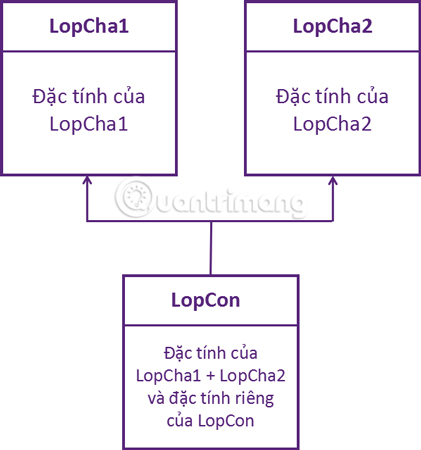

Lớp con được định nghĩa từ nhiều lớp cha và kế thừa đặc tính của cả hai lớp cha.

Các lớp cha có thể có các thuộc tính hoặc các phương thức giống nhau. Lớp con sẽ ưu tiên thừa kế thuộc tính, phương thức của lớp đứng đầu tiên trong danh sách thừa kế.

## <b>Kế thừa đa cấp (Multilevel Inheritance)</b>

Ngoài việc có thể kế thừa từ các lớp cha, bạn còn có thể tạo lớp con mới kế thừa các lớp con trước đó. Đây gọi là kế thừa đa cấp (Multilevel Inheritance).

In [23]:
class LopCha:
     pass

class LopCon1(LopCha):
     pass

class LopCon2(LopCon1):
     pass

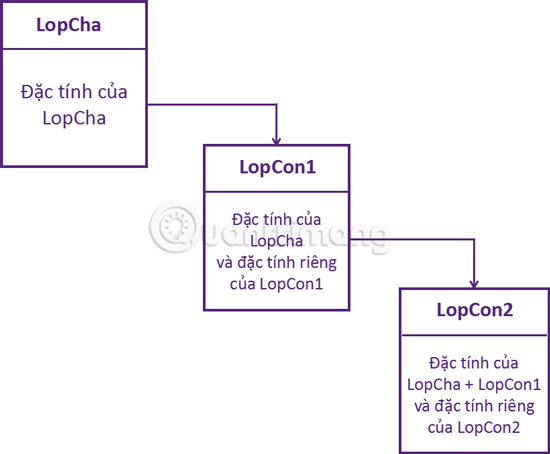

## <b>Thứ tự truy xuất phương thức (Method Resolution Order)</b>

Thứ tự truy xuất phương thức (MRO) là thứ tự mà Python tìm kiếm một phương thức trong hệ thống phân cấp các lớp. Đặc biệt nó đóng vai trò quan trọng đa kế thừa vì phương thức đơn có thể được tìm thấy trong nhiều lớp.

Trong đa thừa kế, bất kỳ thuộc tính cần được truy xuất nào, đầu tiên nó sẽ được tìm kiếm trong lớp hiện tại. Nếu không tìm thấy, tìm kiếm tiếp tục vào lớp cha đầu tiên rồi tiếp tục từ trái qua phải. Vậy thứ tự truy xuất sẽ là [LopCon, LopCha1, LopCha2, object].

Nói một cách dễ hiểu, MRO dùng để hiển thị danh sách/tuple các class cha của một class nào đó. MRO được sử dụng theo hai cách (phải lấy tên class để gọi):
- \__mro__: trả về một tuple
- mro(): trả về một danh sách.

In [25]:
class A:
    def process(self):
        print('A process()')

class B:
    def process(self):
        print('B process()')

class C(A, B):
    pass

obj = C()
obj.process()

print(C.__mro__)     # print MRO for class C

A process()
(<class '__main__.C'>, <class '__main__.A'>, <class '__main__.B'>, <class 'object'>)


In [26]:
class A:
    def process(self):
        print('A process()')

class B:
    def process(self):
        print('B process()')

class C(A, B):
    def process(self):
        print('C process()')

class D(C,B):
    pass

obj = D()
obj.process()
print(D.mro())

C process()
[<class '__main__.D'>, <class '__main__.C'>, <class '__main__.A'>, <class '__main__.B'>, <class 'object'>]


# <b>6. Tính đa hình (polymorphism)</b>

 hai hay nhiều lớp có phương thức giống nhau (tên gọi) nhưng có thể thực thi khác nhau.

In [27]:
class Dog:
    def __init__(self, name):
        self.name = name

    def speak(self):
        return self.name + " says woof"

class Cat:
    def __init__(self, name):
        self.name = name

    def speak(self):
        return self.name + " says meomeo"

mydog = Dog("Tuni")
mycat = Cat("Hani")

print(mydog.speak())   
print(mycat.speak())

Tuni says woof
Hani says meomeo


Nhận thấy cả 2 object mydog và mycat đều có phương thức speak(), tuy nhiên cách thực thi của chúng là khác nhau.

# <b>7. Property</b>

Property là một thành phần đặc biệt trong class Python cho phép truy xuất và kiểm soát truy xuất một attribute cụ thể.

Đầu tiên hãy làm quen với hai khái niệm getters và setters.
- Getters - các method được dùng trong OOP để giúp truy cập các private attribute từ class
- Setters - các method sử dụng trong OOP giúp cài đặt giá trị cho các private attribute trong class.


In [28]:
class Person:

    def __init__(self, fname, lname, age):
        # private attribute __a
        self.__fname = fname
        self.__lname = lname
        self.__age = age

    # getter method để truy cập giá trị của attribute __age
    def get_age(self):
        return self.__age
    # setter method để thay đổi giá trị của attribute __age
    def set_age(self, age):
        if age > 0 :
            self.__age = age

    def get_fname(self):
        return self.__fname

    def set_fname(self, fname):
        if fname.isalpha():
            self.__fname = fname
    
    def get_lname(self):
        return self.__lname

    def set_lname(self, lname):
        if lname.isalpha():
            self.__lname = lname
        
toi = Person("Nguyen", "Le", 24)
print(toi.get_age())

toi.set_age(25)
print(toi.get_age())

24
25


Attribute cần kiểm soát dữ liệu sẽ đặt mức truy cập là private. Ứng với mỗi biến private sẽ xây dựng 2 phương thức getter và setter để xuất và nhập dữ liệu. Tuy nhiên có thể nhận thấy code chứa nhiều lời gọi hàm khiến khó đọc. Do đó ta có thể điều chỉnh như sau nhờ vào property.

In [30]:
class Person:

    def __init__(self, fname: str = '', lname: str = '', age: int = 23):
        # private attribute __a
        self.__fname = fname
        self.__lname = lname
        self.__age = age

    # getter method để truy cập giá trị của attribute __age
    def get_age(self):
        return self.__age
    # setter method để thay đổi giá trị của attribute __age
    def set_age(self, age):
        if age > 0 :
            self.__age = age

    def get_fname(self):
        return self.__fname

    def set_fname(self, fname):
        if fname.isalpha():
            self.__fname = fname
    
    def get_lname(self):
        return self.__lname

    def set_lname(self, lname):
        if lname.isalpha():
            self.__lname = lname
    
    def get_name(self):
        return self.__fname + self.__lname
        
    first_name = property(get_fname, set_fname)
    last_name = property(get_lname, set_lname)
    full_name = property(get_name)
    age = property(get_age, set_age)

toi = Person()
toi.first_name = "Nguyen"
toi.last_name = "Le"
toi.age = 24

print(toi.full_name, toi.age)

NguyenLe 24


Lúc này first_name, last_name, age trở thành các property trong class Python. Trong class Python property là một dạng giao tiếp tới các instance attribute để thực hiện xuất/nhập dữ liệu qua bộ getter/setter. Mỗi property cung cấp cách xuất dữ liệu thông thường và cách nhập dữ liệu thông qua phép gán (ở trên chúng ta có gán first_name, last_name và age). Khi thực hiện property hoàn toàn che đi lời gọi hàm getter/setter.

Như vậy khi sử dụng property first_name bạn có thể viết tự nhiên toi.first_name giống như một biến thành viên thông thường để truy xuất dữ liệu từ biến private __fname. Phép gán giá trị cho first_name sẽ chuyển thành lời gọi hàm set_fname.

Ở trên trong hàm property() chúng ta chỉ để 1 hoặc 2 tham số. Đầy đủ thì hàm property() nhận vào 3 tham số tương ứng với tên hàm getter, setter và deleter. Hàm deleter ít được sử dụng, nó tương đương với del trong Python. Nếu thiếu setter và deleter, property sẽ trở thành read-only (chỉ đọc) như bên trên đối với fullname.

Ngoài cách sử dụng hàm property() như trên chúng ta có thể dụng decorator @property để có tác dụng tương tự.

In [32]:
class Person:

    def __init__(self, fname: str = '', lname: str = '', age: int = 23):
        # private attribute __a
        self.__fname = fname
        self.__lname = lname
        self.__age = age

    @property
    def age(self):
        return self.__age
    @age.setter
    def age(self, age):
        if age > 0 :
            self.__age = age

    @property
    def first_name(self):
        return self.__fname
    @first_name.setter
    def first_name(self, fname):
        if fname.isalpha():
            self.__fname = fname
    
    @property
    def last_name(self):
        return self.__lname
    @last_name.setter
    def last_name(self, lname):
        if lname.isalpha():
            self.__lname = lname
    
    @property
    def full_name(self):
        return self.__fname + self.__lname
        

toi = Person()
toi.first_name = "Nguyen"
toi.last_name = "Le"
toi.age = 24

print(toi.full_name, toi.age)

NguyenLe 24


Một số điểm cần lưu ý:
- Getter, setter (cả deleter) đều sử dụng chung một tên, đó cũng là tên của property để gọi. Ví dụ ở trên có tạo age property để truy xuất cho attribute __age thì cần tạo getter, setter và deletre với cùng một tên age.
- Phương thức getter cần đánh dấu với @property
- Phương thức setter cần đánh dấu với @tên property.setter, phương thức deleter cần đánh dấu với @tên property.deleter. Ví dụ với age property thì setter phải đánh dấu @age.setter, deleter phải đánh dấu @age.deleter.

# <b>8. Magic method (dunder method)</b>

Magic method hay dunder method là các method có tiền tố và hậu tố là 2 dấu gạch dưới \__. Một số ví dụ của dunder method như \__init__, \__add__, \__len__, \__repr__ etc.

In [36]:
mylist = [1, 2, 3]
print(len(mylist))

class Sample:
    pass

mysample = Sample()
print("Trả về vị trí lưu object trong memory: ", mysample)
print("Bao loi: ", len(mysample))

3
Trả về vị trí lưu object trong memory:  <__main__.Sample object at 0x7f670dc1bc10>


TypeError: object of type 'Sample' has no len()

Nhận thấy việc dùng len đối với object bị báo lỗi. Nếu chúng ta muốn sử dụng một số hàm đó cho object thì phải làm thế nào?

In [37]:
class Book:
    def __init__(self, title, author, pages):
        self.title = title
        self.author = author
        self.pages = pages

book = Book("Python book", "Nguyen", 212)

print(book)     # khi in ra thông báo có object in memory

""" Nên khi khi gọi hàm print() nó sẽ in ra string thể hiện book 
Chuyển book về string là biết ngay """
print(str(book))

In [38]:
class Book:
    def __init__(self, title, author, pages):
        self.title = title
        self.author = author
        self.pages = pages

    def __str__(self):
        return f"{self.title} by {self.author}"     # hoặc để string thông thường

    # tương tự làm với len
    def __len__(self):
        return self.pages

    # thêm del (xóa object)
    def __del__(self):
        print("The book has been deleted")  # thông báo khi xóa

book = Book("Python book", "Nguyen", 212)
print(book)    # kết quả đã khác rồi

print(len(book))

del book  # xóa object
print(book)     # đã xóa rồi không còn nữa

Python book by Nguyen
212
The book has been deleted


NameError: name 'book' is not defined

Ở bên trên chúng ta đã định nghĩa một số magic method (dunder) như \__str__, \__len__, \__del__. Lúc này chúng ta có thể in thông tin của object… (nói chung tùy theo mình điều chỉnh).

## <b>Nạp chồng toán tử</b>

Toán tử Python làm việc bằng các hàm được dựng sẵn, nhưng một toán tử có thể được sử dụng để thực hiện nhiều hoạt động khác nhau. Ví dụ với toán tử ‘ + ‘, bạn có thể cộng số học hai số với nhau, có thể kết hợp hai danh sách, hoặc nối hai chuỗi khác nhau lại…

Tính năng này trong Python gọi là nạp chồng toán tử, cho phép cùng một toán tử được sử dụng khác nhau tùy từng ngữ cảnh.

Bên trên chúng ta đã tìm hiểu một số magic method rồi. Trong phần này chúng ta sẽ áp dụng magic method để thực hiện nạp chồng toán tử.

Ví dụ để nạp chồng toán tử + chúng ta sử dụng phương thức \__add__() như sau:

In [39]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __str__(self):
        return "Tọa độ: ({}, {})".format(self.x, self.y)

    def __add__(self, other):
        x = self.x + other.x
        y = self.y + other.y
        return Point(x, y)

point_1 = Point(1, 1)
point_2 = Point(2, 2)

print(point_1, point_2)
print(point_1 + point_2)

Tọa độ: (1, 1) Tọa độ: (2, 2)
Tọa độ: (3, 3)


Khi thực hiện point_1 + point_2, Python sẽ gọi ra p1.\__add__(p2).

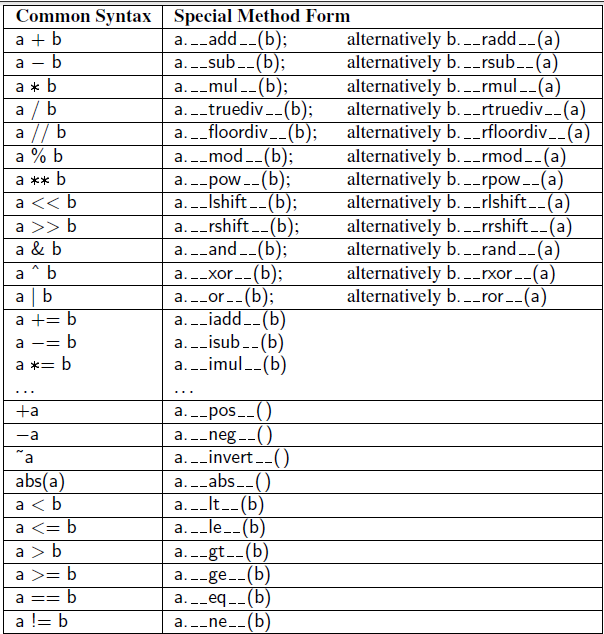

Chúng ta thử một ví dụ cho nạp chồng phép toán so sánh cho khoảng cách từ một điểm đến gốc tọa độ:

In [42]:
class Point:
     def __init__(self, x = 0, y = 0):
        self.x = x
        self.y = y

     def __str__(self):
        return "({},{})".format(self.x, self.y)

     def __lt__(self, other):
        self_dis = (self.x ** 2) + (self.y ** 2)
        other_dis = (other.x ** 2) + (other.y ** 2)
        return self_dis < other_dis

point_1 = Point(1, 1)
point_2 = Point(2, 2)
print(point_1 < point_2)
print(point_2 < point_1)

True
False
